# AUTOMOBILE INSURANCE  FRAUD

In [107]:
from IPython.display import Image
Image(url= "https://i.pinimg.com/originals/a3/b7/33/a3b733ec44304d380b071c2d29d5893b.jpg")

## Introduction

### Insurance fraud involves any misuse of insurance policies or applications in order to illegally gain or benefit. Insurance fraud is usually an attempt to exploit an insurance contract for financial gain. The majority of insurance fraud cases involve exaggerated or false claims.Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims.In this project, i will be working on a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

## Libraries

In [7]:
# IMPORTS LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn import metrics

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


In [1]:
# I have import important libraries for this project in one go so that it will save time.

## Dataset

In [8]:
df = pd.read_csv('Automobile_insurance_fraud.csv')
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [2]:
# It is a big dataset as number of columns is 40. Surely few columns need to drop as it is of no use.

## EDA - Exploratory Data Analysis

In [12]:
df.shape

(1000, 40)

In [ ]:
# There are 1000 rows and 40 columns in the dataset.

In [9]:
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [3]:
# It is a mixed dataset as 21 columns are object type, 17 columns are integers type and 2 columns are float type.
# There is no missing values in any columns as count is 1000 for every columns.

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.shape

(1000, 40)

In [12]:
# There are no duplicates values in this dataset.

In [13]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [14]:
# There are few columns which are categorical in nature and few columns are continous in nature.
# _c39 columns i will drop soon as it has no data in it.

In [15]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [16]:
# Total number of counts in each columns is matching as there is no missing values.
# The difference betwwen the mean and 50% is not much.
# There are outlires in the dataset which i will remove it soon.

In [17]:
# dropping _c39
df.drop('_c39',inplace=True,axis=1)

In [18]:
# I am dropping _c39 columns as it doesn't contain any valuable infomation.

## Pair Plot

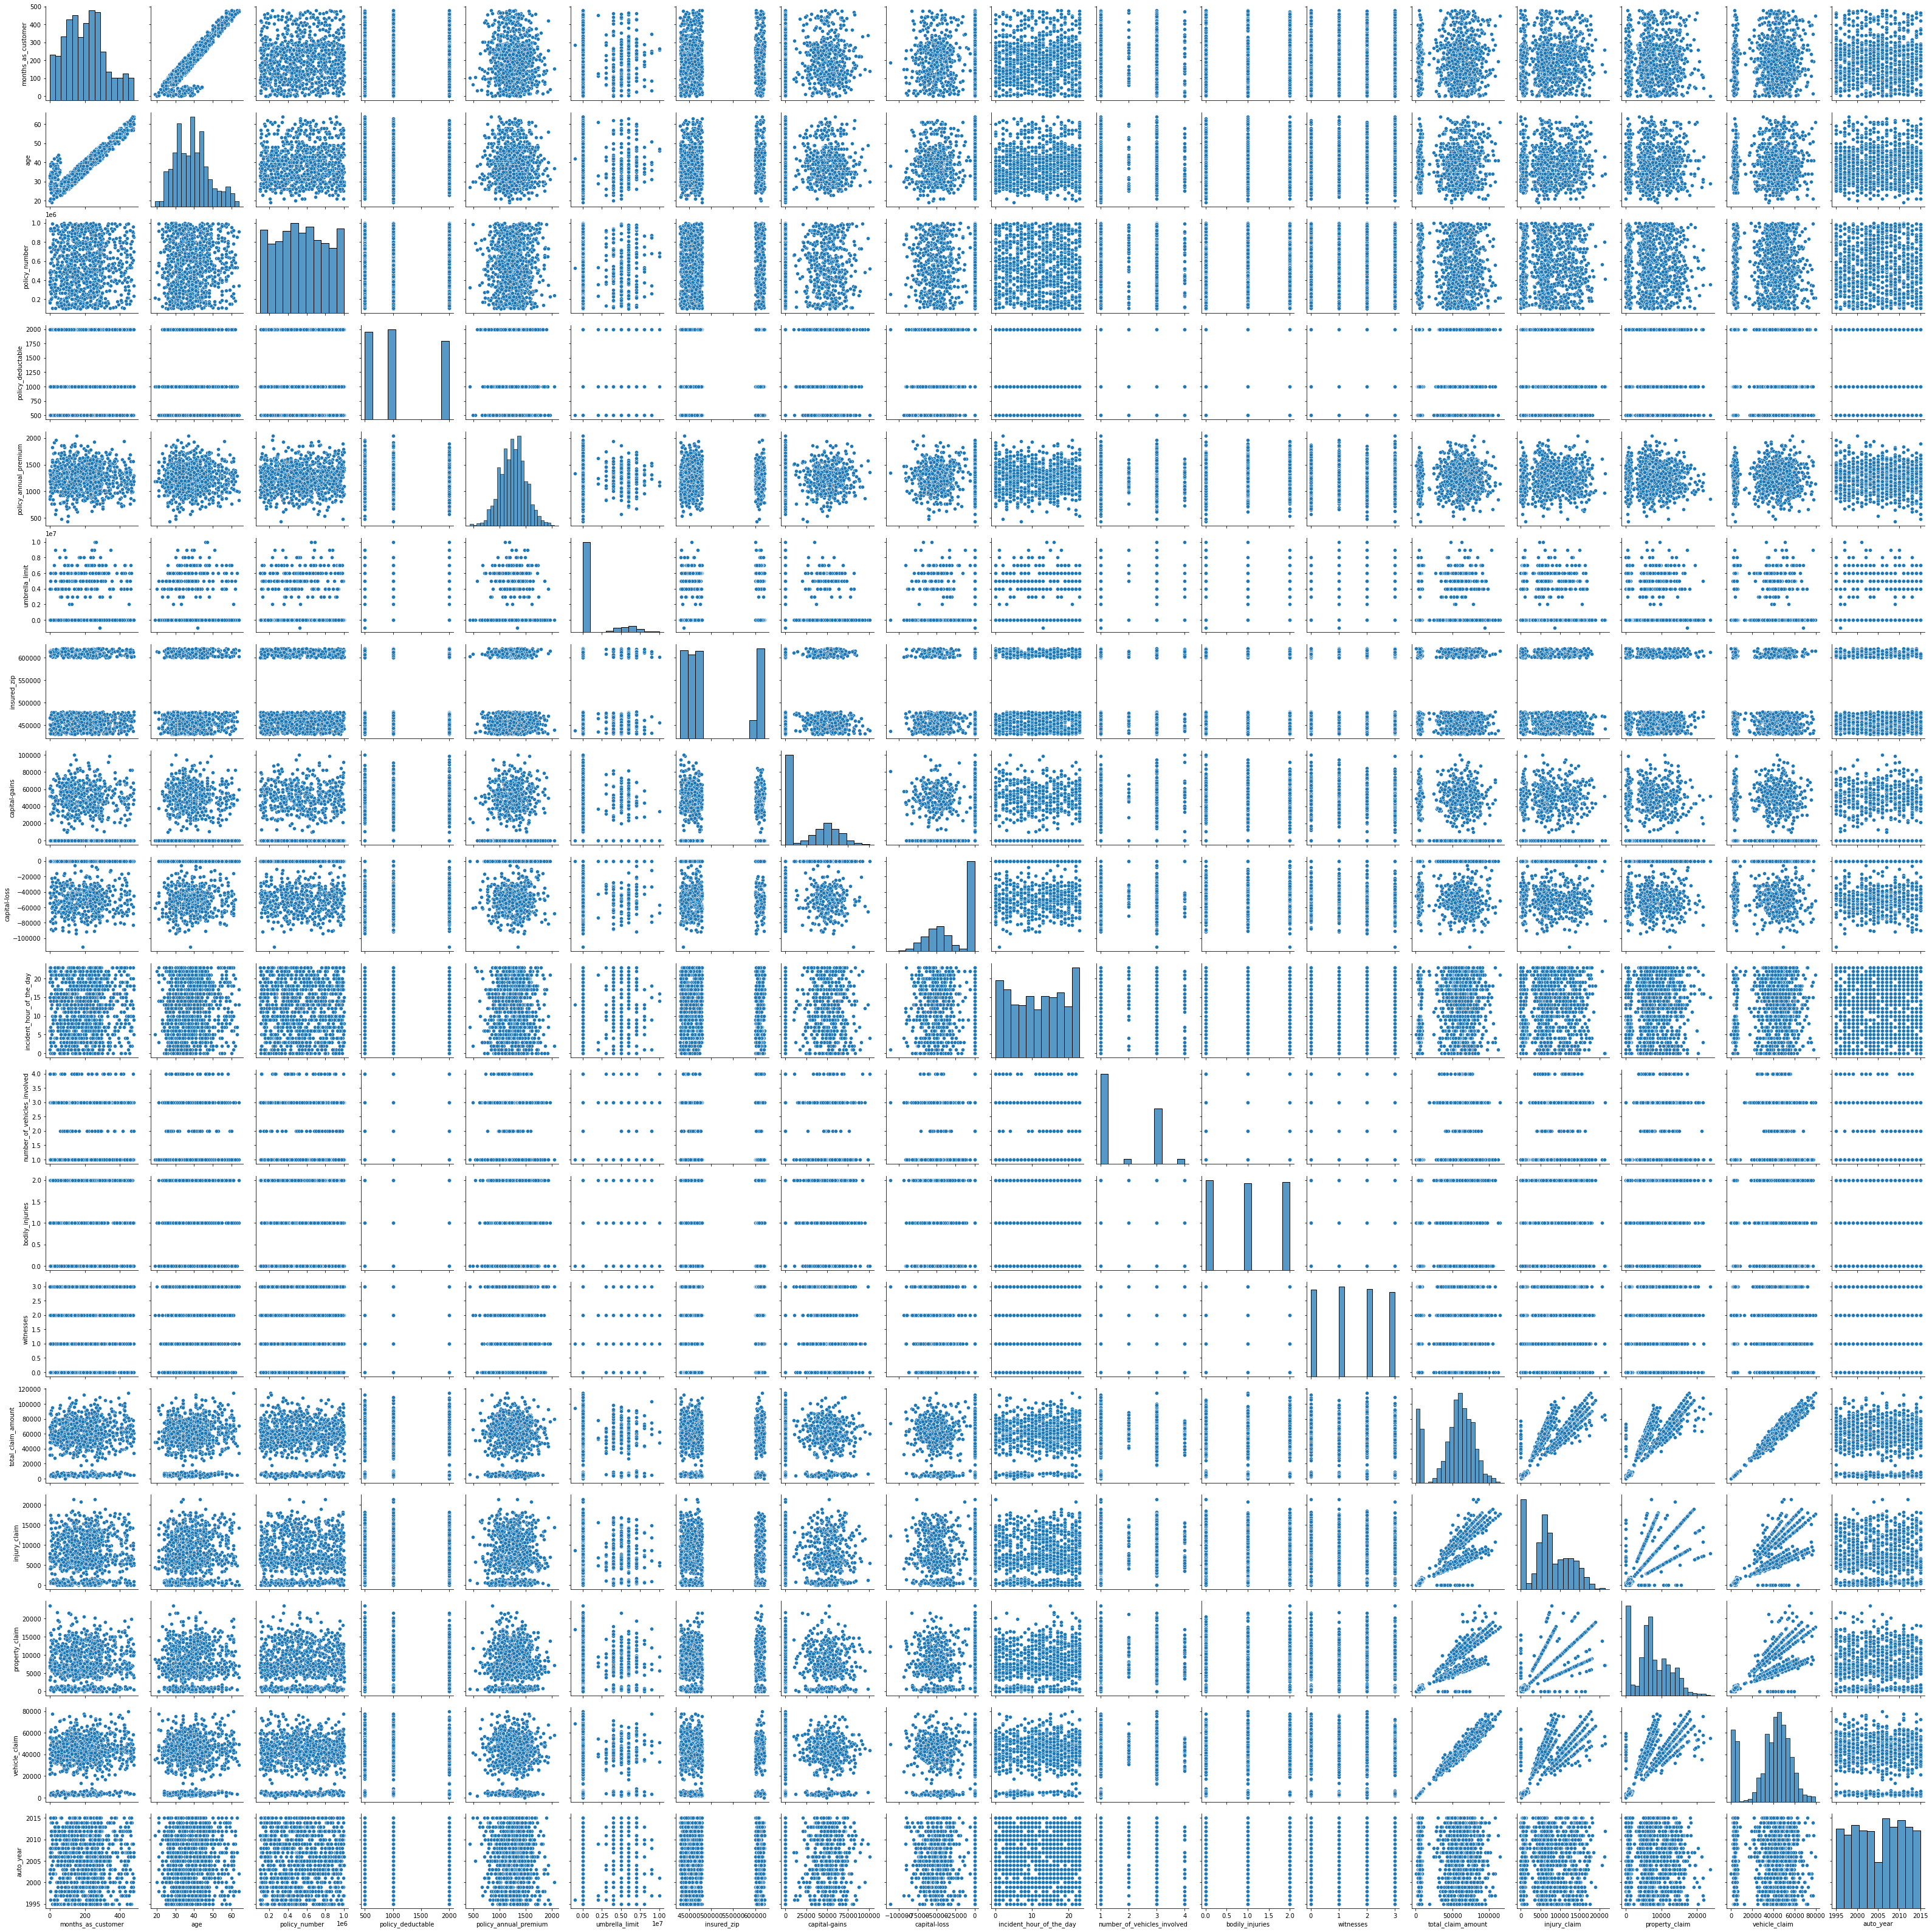

In [10]:
sns.pairplot(df)

In [8]:
# The above pair plot gives us the clear idea that target variable 'fraud_reported' are positively corelated with few feature.
# Only few columns are not correlated.

## Heatmap

[]

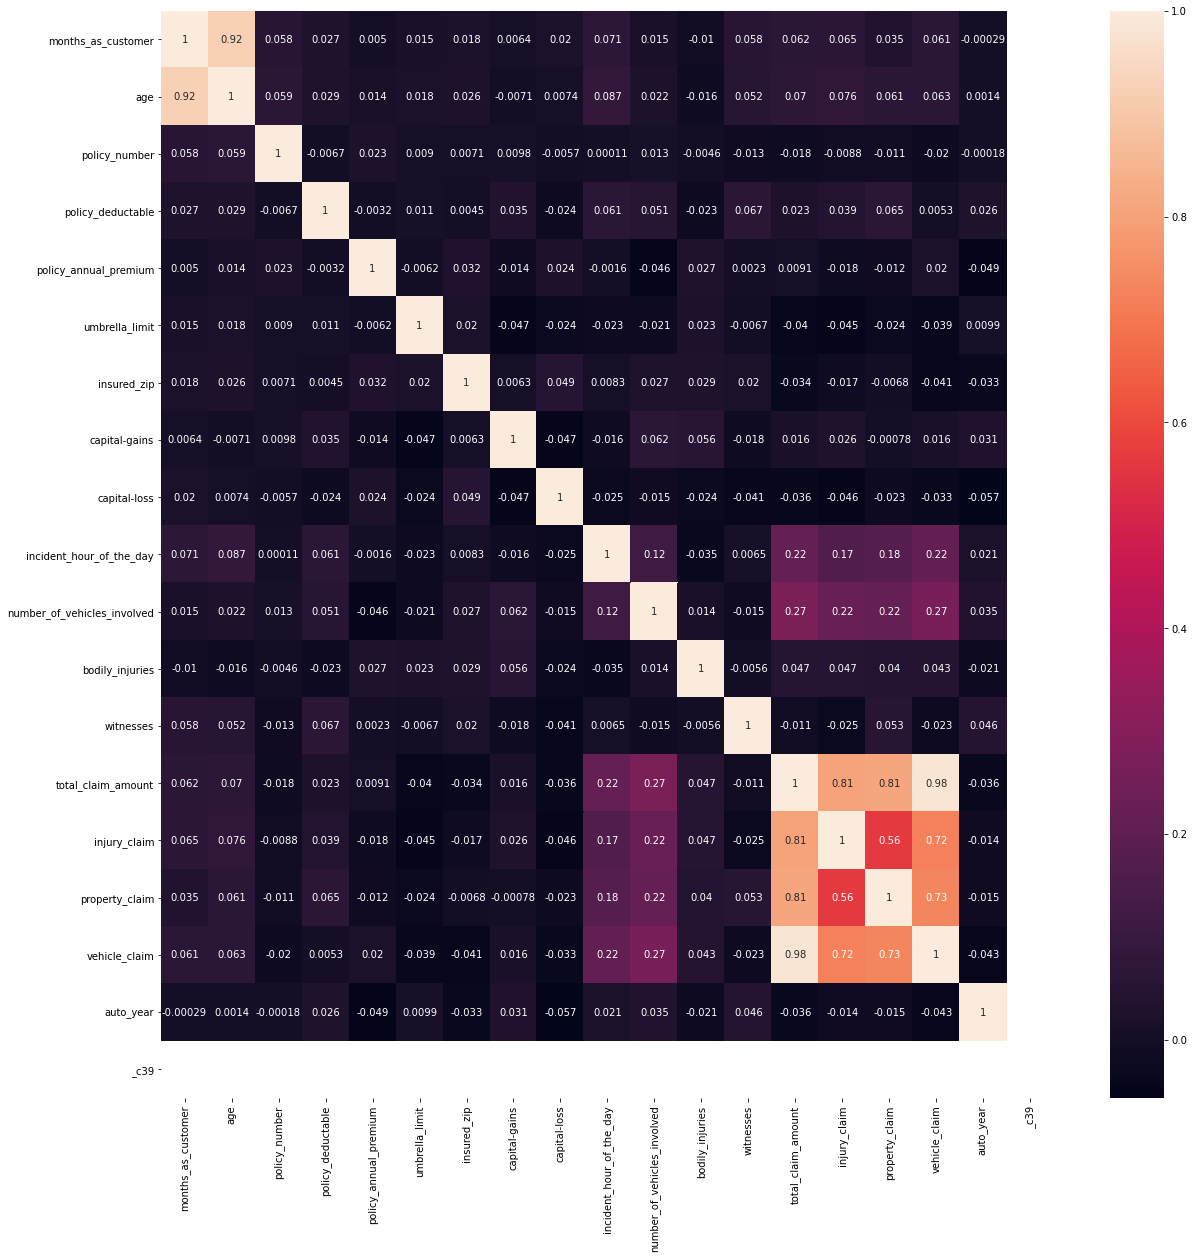

In [16]:
#checking the co-relation of all column to each other
df_cor = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_cor,annot=True)
plt.plot()

In [17]:
# Total claim amount and vehicle claim is positively correlated with each other.
# injury claim and vehicle claim is positively correlated with each other.
# property claim and vehicle claim is positively correlated with each other.
# policy number and witness are negatively correlated to each other.
# policy deductable and body injuries are negatively correlated to each other.

# count plot & Pie Plot

## fraud_reported

In [12]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

(array([0, 1]), [Text(0, 0, 'Y'), Text(1, 0, 'N')])

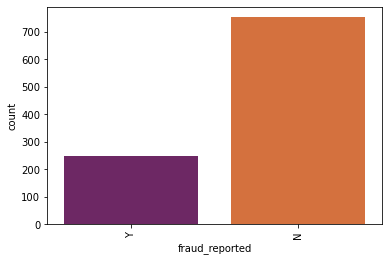

In [13]:
sns.countplot(df['fraud_reported'],palette='inferno',data=df);
plt.xticks(rotation=90)

In [18]:
# There are 247 fraud reported cases and 753 cases are genuine claim.

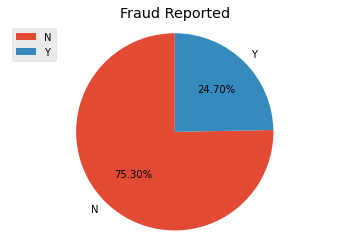

In [14]:
labels = ['N', 'Y']
value = [753, 247] # 
# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'fraud_reported')
plt.style.use('ggplot')
plt.title('Fraud Reported')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

In [19]:
# Out of total cases 75.30% are not fraud reported and only 24.70% are fraud reported cases.

### insured_sex

In [24]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

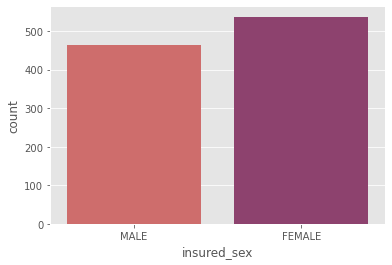

In [25]:
sns.countplot(df['insured_sex'],palette='flare',data=df);

In [1]:
# There are more number of female insured than mens.

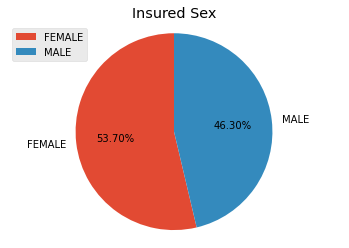

In [26]:
#  pie plot of insured_sex 

labels = ['FEMALE', 'MALE']
value = [537, 463] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'insured_education_level')
plt.style.use('ggplot')
plt.title('Insured Sex')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

In [2]:
# The above pie chat gives me an idea that female getting insured numbers are high.

### insured_education_level

In [27]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'MD'),
  Text(1, 0, 'PhD'),
  Text(2, 0, 'Associate'),
  Text(3, 0, 'Masters'),
  Text(4, 0, 'High School'),
  Text(5, 0, 'College'),
  Text(6, 0, 'JD')])

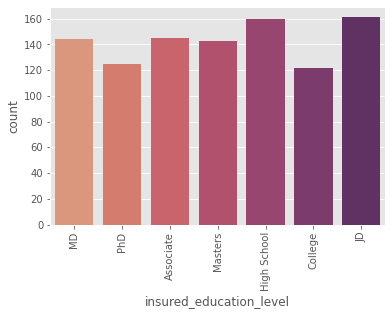

In [28]:
sns.countplot(df['insured_education_level'],palette='flare',data=df);
plt.xticks(rotation=90)

In [3]:
# Those who are holding only college degree are very less in number in terms of getting insured.

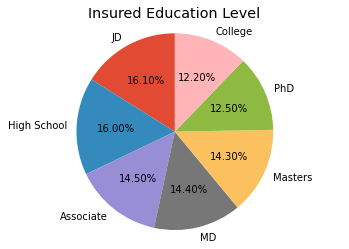

In [29]:
#  pie plot of insured_education_level

labels = ['JD', 'High School', 'Associate', 'MD', 'Masters','PhD','College']
value = [161, 160, 145, 144, 143, 125, 122] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'insured_education_level')
plt.style.use('ggplot')
plt.title('Insured Education Level')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [4]:
# Only college and PHD degree holders are less % in terms of getting insured.

### insured_occupation

In [30]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'craft-repair'),
  Text(1, 0, 'machine-op-inspct'),
  Text(2, 0, 'sales'),
  Text(3, 0, 'armed-forces'),
  Text(4, 0, 'tech-support'),
  Text(5, 0, 'prof-specialty'),
  Text(6, 0, 'other-service'),
  Text(7, 0, 'priv-house-serv'),
  Text(8, 0, 'exec-managerial'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'transport-moving'),
  Text(11, 0, 'handlers-cleaners'),
  Text(12, 0, 'adm-clerical'),
  Text(13, 0, 'farming-fishing')])

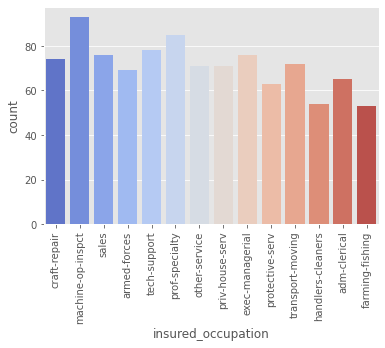

In [32]:
sns.countplot(df['insured_occupation'],palette='coolwarm',data=df);
plt.xticks(rotation=90)

In [5]:
# machine-op-inspct are only profession that are highly insured.
# handlers-cleaners are least interested in getting insured.

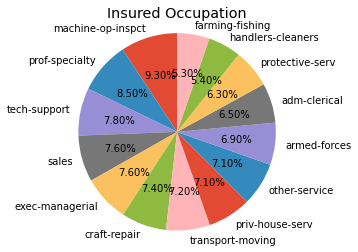

In [33]:
#  pie plot of insured_occupation 

labels = ['machine-op-inspct', 'prof-specialty', 'tech-support', 'sales', 'exec-managerial','craft-repair','transport-moving','priv-house-serv','other-service','armed-forces','adm-clerical','protective-serv','handlers-cleaners','farming-fishing']
value = [93, 85, 78, 76, 76, 74, 72, 71, 71, 69, 65, 63, 54, 53] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'insured_occupation')
plt.style.use('ggplot')
plt.title('Insured Occupation')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.55)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [6]:
# machine-op-inspct are only profession that are highly insured.
# handlers-cleaners are least interested in getting insured.

## insured_hobbies

In [34]:
df['insured_hobbies'].value_counts()

reading           64
paintball         57
exercise          57
bungie-jumping    56
golf              55
camping           55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

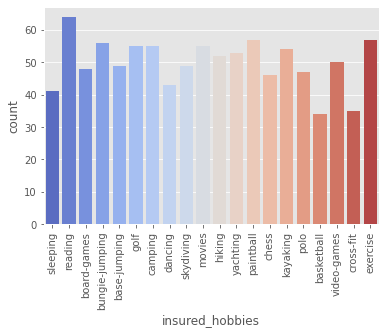

In [35]:
sns.countplot(df['insured_hobbies'],palette='coolwarm',data=df);
plt.xticks(rotation=90)

In [7]:
# Those who have reading habits are more in numbers in terms of getting insured
# basketball are least interested in getting insured.

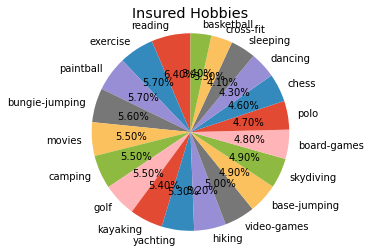

In [36]:
#  pie plot of insured_hobbies 

labels = ['reading', 'exercise', 'paintball', 'bungie-jumping', 'movies','camping','golf','kayaking','yachting','hiking','video-games','base-jumping','skydiving','board-games','polo','chess','dancing','sleeping','cross-fit','basketball']
value = [64, 57, 57, 56, 55, 55, 55, 54, 53, 52, 50, 49, 49, 48, 47, 46, 43, 41, 35, 34] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'insured_hobbies')
plt.style.use('ggplot')
plt.title('Insured Hobbies')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [8]:
# Those who have reading habits are more in numbers in terms of getting insured
# basketball are least interested in getting insured.

## insured_relationship

In [37]:
df['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'husband'),
  Text(1, 0, 'other-relative'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'wife'),
  Text(5, 0, 'not-in-family')])

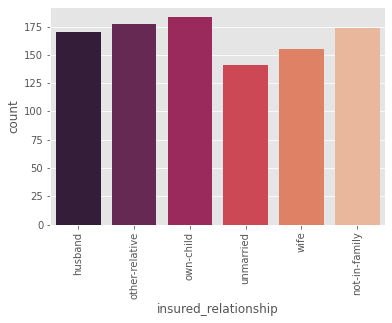

In [38]:
sns.countplot(df['insured_relationship'],palette='rocket',data=df);
plt.xticks(rotation=90)

In [9]:
# Those who have own child are more in numbers in terms of getting insured.
# Unmarried are least interested in getting insured.

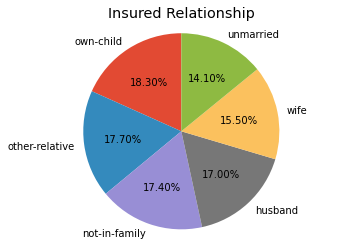

In [40]:
#  pie plot of insured_relationship 

labels = ['own-child', 'other-relative', 'not-in-family', 'husband', 'wife','unmarried']
value = [183, 177, 174, 170, 155, 141] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'insured_relationship')
plt.style.use('ggplot')
plt.title('Insured Relationship')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [10]:
# Those who have own child are more in numbers in terms of getting insured.
# Unmarried are least interested in getting insured.

## incident_type

In [41]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Single Vehicle Collision'),
  Text(1, 0, 'Vehicle Theft'),
  Text(2, 0, 'Multi-vehicle Collision'),
  Text(3, 0, 'Parked Car')])

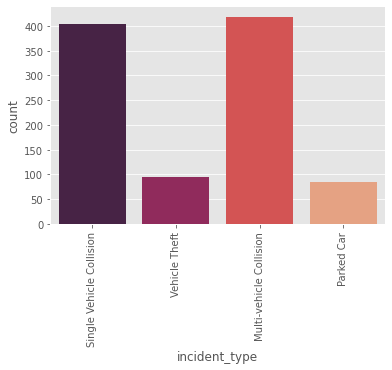

In [42]:
sns.countplot(df['incident_type'],palette='rocket',data=df);
plt.xticks(rotation=90)

In [11]:
# Those who suffered Multi-vehicle Collision are more in numbers in terms of getting insured.

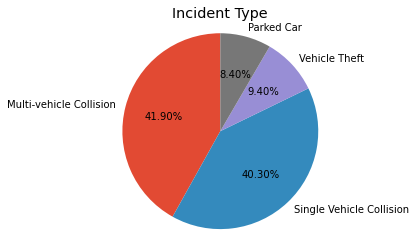

In [43]:
#  pie plot of incident_type 
labels = ['Multi-vehicle Collision', 'Single Vehicle Collision', 'Vehicle Theft', 'Parked Car']
value = [419, 403, 94, 84] # 
# plt.pie(x=vbalue, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'incident_type')
plt.style.use('ggplot')
plt.title('Incident Type')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [12]:
# Those who suffered Multi-vehicle Collision are more in numbers in terms of getting insured.

## collision_type

In [19]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [20]:
# repalcing the values with mode
df['collision_type'] = df['collision_type'].str.replace('?','Rear Collision')

In [21]:
# There are few missing values that is replaced with the help of rear collision.

In [22]:
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Side Collision'),
  Text(1, 0, 'Rear Collision'),
  Text(2, 0, 'Front Collision')])

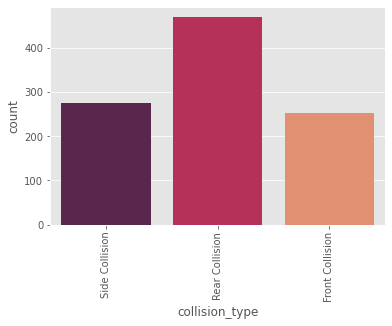

In [47]:
sns.countplot(df['collision_type'],palette='rocket',data=df);
plt.xticks(rotation=90)

In [14]:
# Those who have real collision are more in numbers in terms of getting insured.
# Front collision are least in numbers of getting insured.

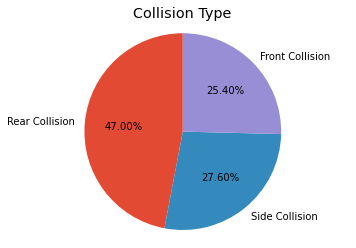

In [48]:
#  pie plot of collision_type 

labels = ['Rear Collision', 'Side Collision', 'Front Collision']
value = [470, 276, 254] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'collision_type')
plt.style.use('ggplot')
plt.title('Collision Type')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [15]:
# Those who have real collision are more in numbers in terms of getting insured.
# Front collision are least in numbers of getting insured.

## incident_severity

In [49]:
df['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Major Damage'),
  Text(1, 0, 'Minor Damage'),
  Text(2, 0, 'Total Loss'),
  Text(3, 0, 'Trivial Damage')])

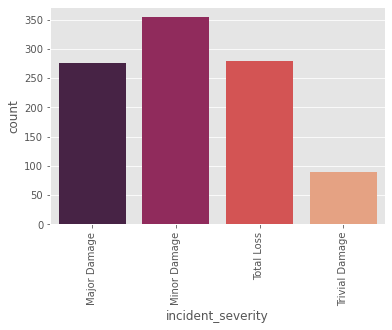

In [50]:
sns.countplot(df['incident_severity'],palette='rocket',data=df);
plt.xticks(rotation=90)

In [16]:
# Those who have minor damage are higest in numbers of getting insured
# Those who have Trivial Damage are lowest in numbers of getting insured.

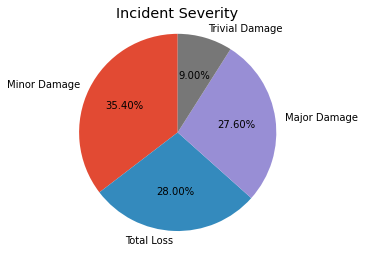

In [51]:
#  pie plot of incident_severity 

labels = ['Minor Damage', 'Total Loss', 'Major Damage','Trivial Damage']
value = [354, 280, 276, 90] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'incident_severity')
plt.style.use('ggplot')
plt.title('Incident Severity')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [17]:
# Those who have minor damage are highest in numbers of getting insured
# Those who have Trivial Damage are lowest in numbers of getting insured.

## authorities_contacted

In [52]:
df['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Police'),
  Text(1, 0, 'None'),
  Text(2, 0, 'Fire'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Ambulance')])

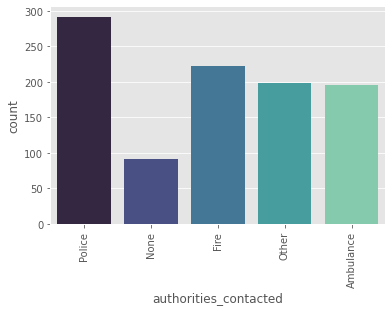

In [53]:
sns.countplot(df['authorities_contacted'],palette='mako',data=df);
plt.xticks(rotation=90)

In [18]:
# Those who have contacted police are highest in numbers of getting insured.
# Those who have contacted no one are lowest in numbers of getting insured.

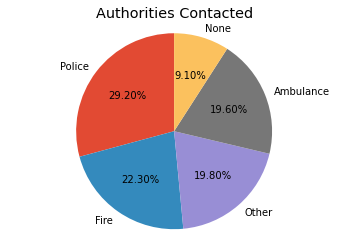

In [54]:
#  pie plot of authorities_contacted 

labels = ['Police', 'Fire', 'Other','Ambulance', 'None']
value = [292, 223, 198, 196, 91] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'authorities_contacted')
plt.style.use('ggplot')
plt.title('Authorities Contacted')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [19]:
# Those who have contacted police are highest in numbers of getting insured.
# Those who have contacted no one are lowest in numbers of getting insured.

## incident_city

In [58]:
df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Columbus'),
  Text(1, 0, 'Riverwood'),
  Text(2, 0, 'Arlington'),
  Text(3, 0, 'Springfield'),
  Text(4, 0, 'Hillsdale'),
  Text(5, 0, 'Northbend'),
  Text(6, 0, 'Northbrook')])

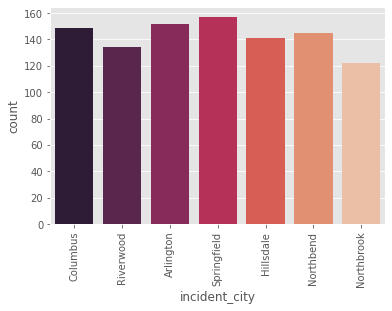

In [59]:
sns.countplot(df['incident_city'],palette='rocket',data=df);
plt.xticks(rotation=90)

In [20]:
# Springfield are highest in numbers of getting insured.
# Northbrook are lowest in numbers of getting insured.

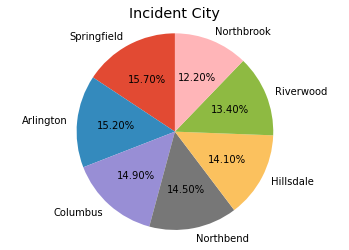

In [60]:
#  pie plot of incident_city 

labels = ['Springfield', 'Arlington', 'Columbus','Northbend', 'Hillsdale', 'Riverwood', 'Northbrook']
value = [157, 152, 149, 145, 141, 134, 122] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'incident_city')
plt.style.use('ggplot')
plt.title('Incident City')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [21]:
# Springfield are highest in numbers of getting insured.
# Northbrook are lowest in numbers of getting insured.

## property_damage

In [23]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [24]:
# repalcing the values with mode
df['property_damage'] = df['property_damage'].str.replace('?','NO')

In [25]:
# There are few missing values that is removed from property_damage columns.

In [26]:
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

(array([0, 1]), [Text(0, 0, 'YES'), Text(1, 0, 'NO')])

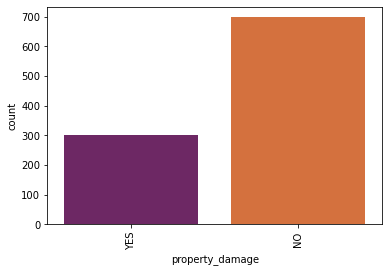

In [27]:
sns.countplot(df['property_damage'],palette='inferno',data=df);
plt.xticks(rotation=90)

In [28]:
# Property_damage are more in numbers.

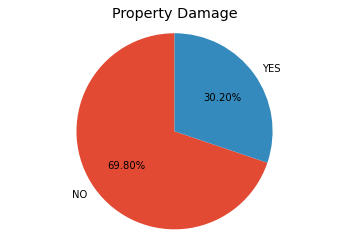

In [68]:
#  pie plot of property_damage 

labels = ['NO', 'YES']
value = [698, 302] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'property_damage')
plt.style.use('ggplot')
plt.title('Property Damage')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [23]:
# Property_damage are more in numbers.

## witnesses

In [69]:
df['witnesses'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

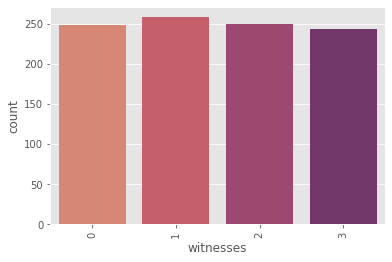

In [70]:
sns.countplot(df['witnesses'],palette='flare',data=df);
plt.xticks(rotation=90)

In [24]:
# Those who are insured and have atleast 1  witness are highest in numbers of getting insured.

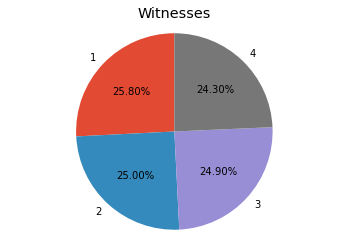

In [71]:
#  pie plot of witnesses 

labels = ['1', '2', '3', '4']
value = [258, 250, 249, 243] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'witnesses')
plt.style.use('ggplot')
plt.title('Witnesses')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [25]:
# Those who are insured and have atleast 1  witness are highest in numbers of getting insured.

## police_report_available

In [29]:
df['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [30]:
# repalcing the values with mode
df['police_report_available'] = df['police_report_available'].str.replace('?','NO')

In [31]:
# There are few missing values that is replaced from police_report_available columns.

In [32]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

(array([0, 1]), [Text(0, 0, 'YES'), Text(1, 0, 'NO')])

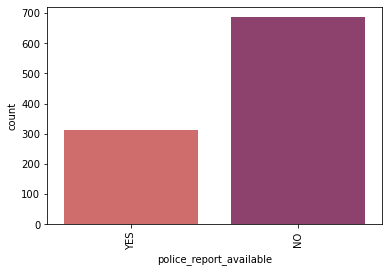

In [33]:
sns.countplot(df['police_report_available'],palette='flare',data=df);
plt.xticks(rotation=90)

In [34]:
# Most of the claim cases there are no police report available.

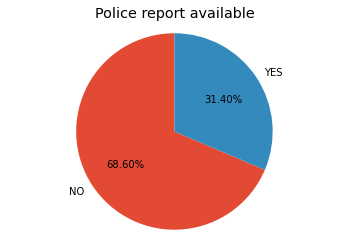

In [76]:
#  pie plot of police_report_available 

labels = ['NO', 'YES']
value = [686, 314] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'police_report_available')
plt.style.use('ggplot')
plt.title('Police report available')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [27]:
# Most of the claim cases there are no police report available.

# Catplot

## months_as_customer

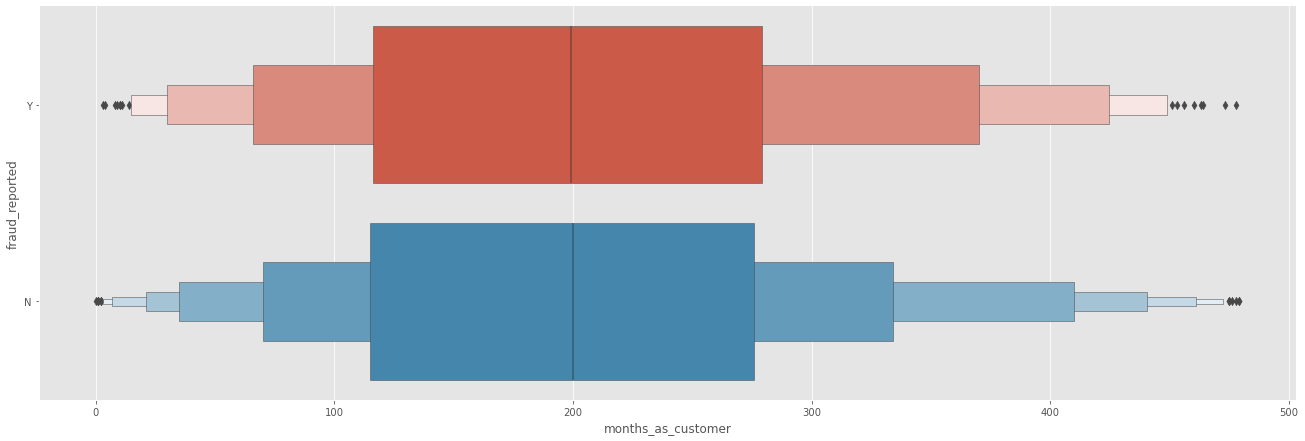

In [91]:
sns.catplot(y="fraud_reported",x="months_as_customer",data=df.sort_values("fraud_reported",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [28]:
# I can say that month as a customer doesn't affect much in terms of fraud reported.

## age

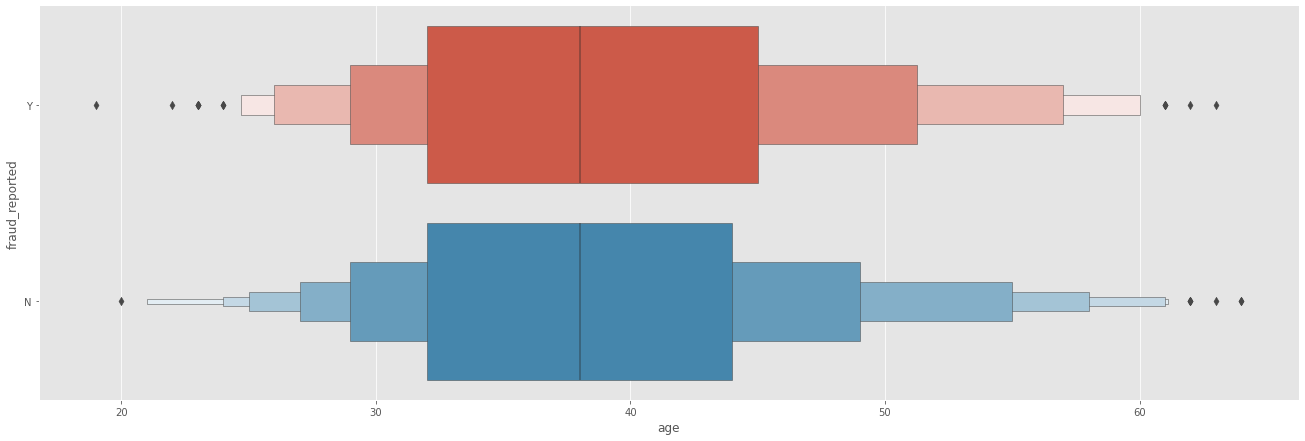

In [92]:
sns.catplot(y="fraud_reported",x="age",data=df.sort_values("fraud_reported",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [29]:
# I can say that age doesn't affect much in terms of fraud reported.

## policy_number

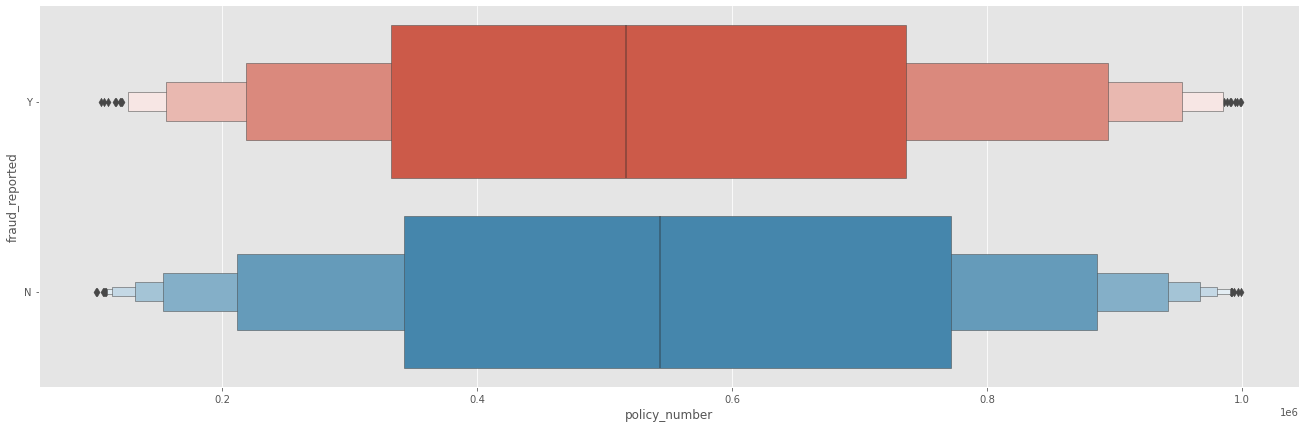

In [93]:
sns.catplot(y="fraud_reported",x="policy_number",data=df.sort_values("fraud_reported",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [30]:
# I can say that policy_number doesn't affect much in terms of fraud reported.

## policy_annual_premium

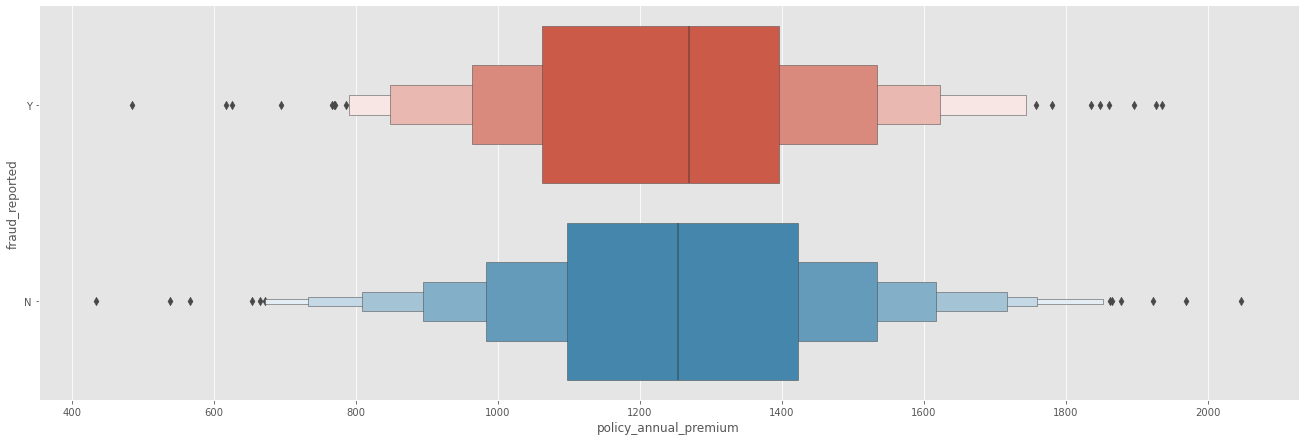

In [95]:
sns.catplot(y="fraud_reported",x="policy_annual_premium",data=df.sort_values("fraud_reported",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [31]:
# The above cat plot gives me an idea that those customers who are paying high policy premium are less fraud reported.

## insured_zip

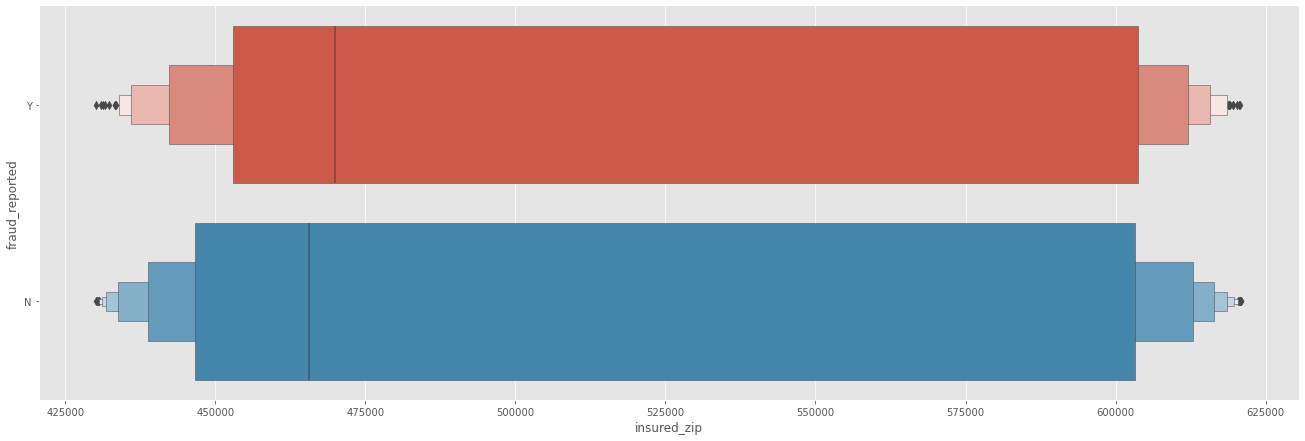

In [96]:
sns.catplot(y="fraud_reported",x="insured_zip",data=df.sort_values("fraud_reported",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [32]:
# I can say that insured_zip doesn't affect much in terms of fraud reported.

## capital-gains

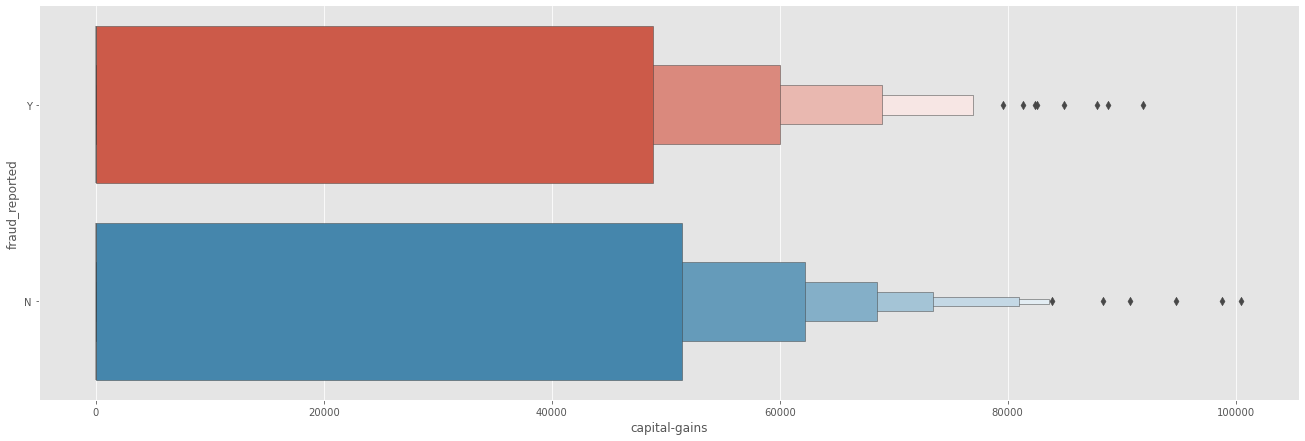

In [97]:
sns.catplot(y="fraud_reported",x="capital-gains",data=df.sort_values("fraud_reported",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [33]:
# I can say that capital-gains doesn't affect much in terms of fraud reported.

## total_claim_amount

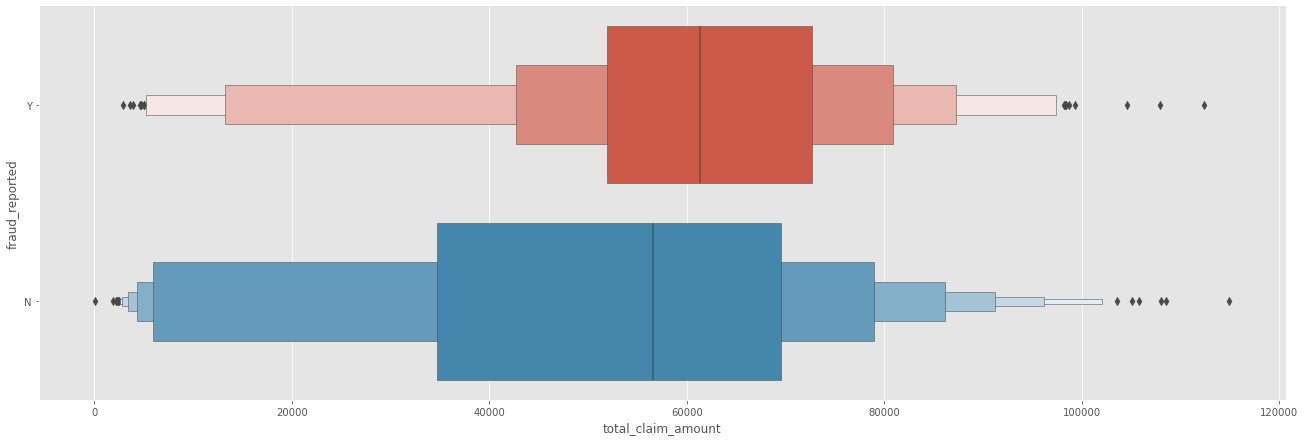

In [100]:
sns.catplot(y="fraud_reported",x="total_claim_amount",data=df.sort_values("fraud_reported",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [34]:
# I can say that total_claim_amount doesn't affect much in terms of fraud reported.

## injury_claim

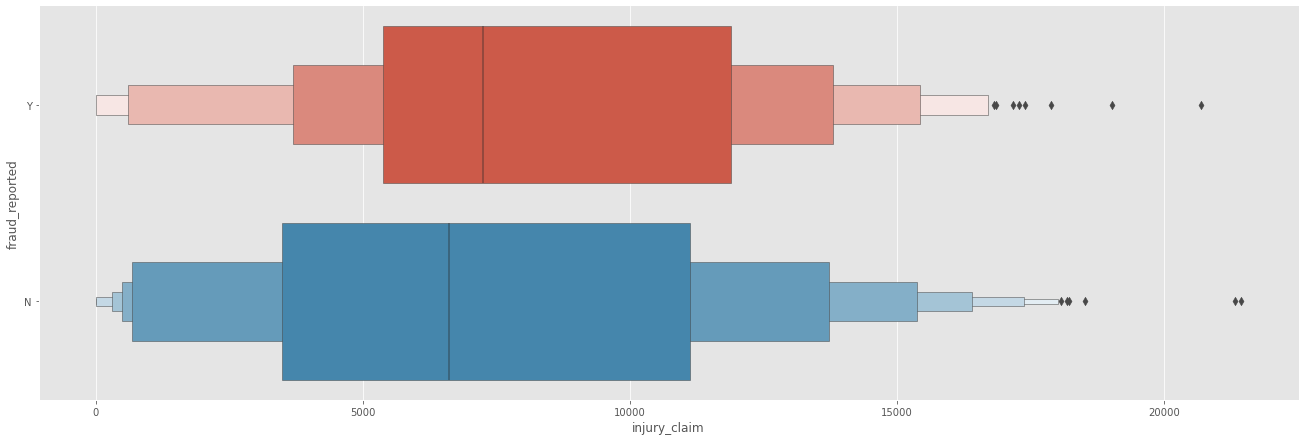

In [101]:
sns.catplot(y="fraud_reported",x="injury_claim",data=df.sort_values("fraud_reported",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [35]:
# I can say that injury_claim doesn't affect much in terms of fraud reported.

## property_claim

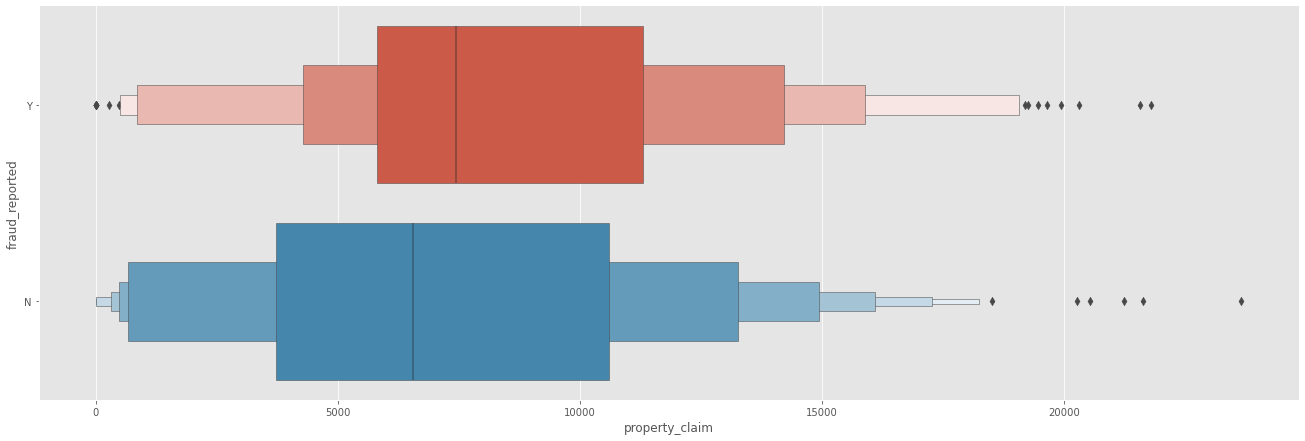

In [102]:
sns.catplot(y="fraud_reported",x="property_claim",data=df.sort_values("fraud_reported",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [36]:
# I can say that property_claim doesn't affect much in terms of fraud reported.

## vehicle_claim

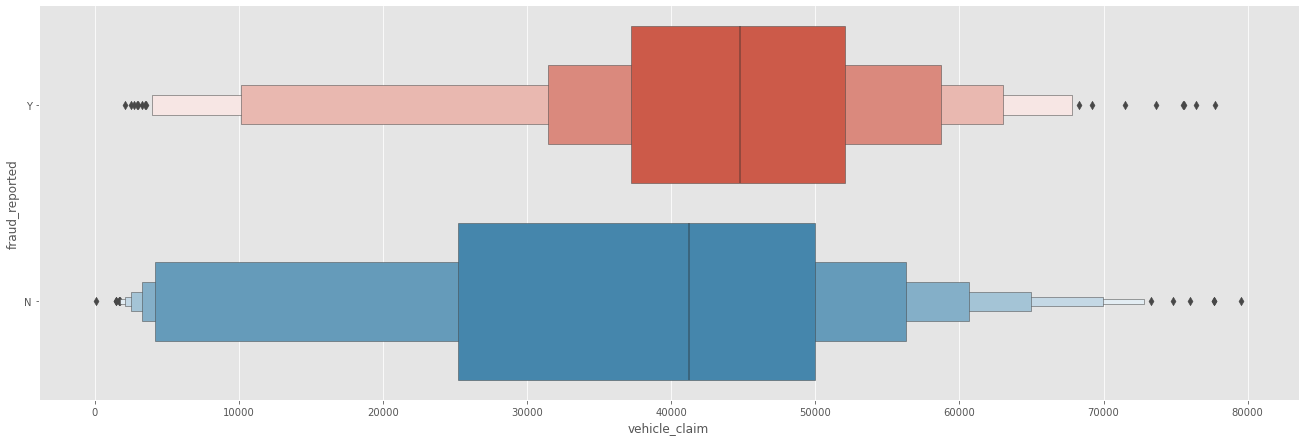

In [103]:
sns.catplot(y="fraud_reported",x="vehicle_claim",data=df.sort_values("fraud_reported",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [37]:
# I can say that vehicle_claim doesn't affect much in terms of fraud reported.

## Scatter Plot

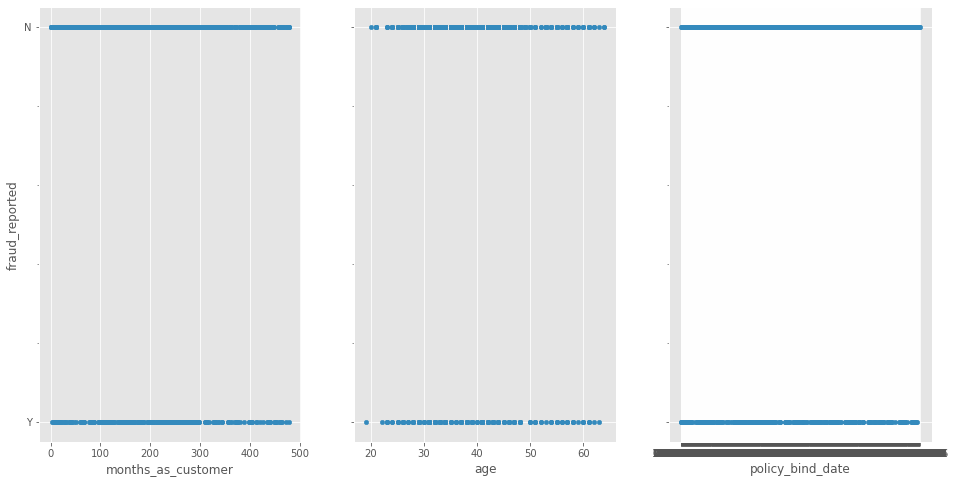

In [106]:
fig,axs = plt.subplots(1,3,sharey = True)
df.plot(kind='scatter',x='months_as_customer',y='fraud_reported',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='policy_csl',y='fraud_reported',ax=axs[1])
df.plot(kind='scatter',x='policy_bind_date',y='fraud_reported',ax=axs[2])
fig.savefig('testdata.jpg')

In [38]:
# I have used 3 different columns but none of them are positively or negatively correlated.

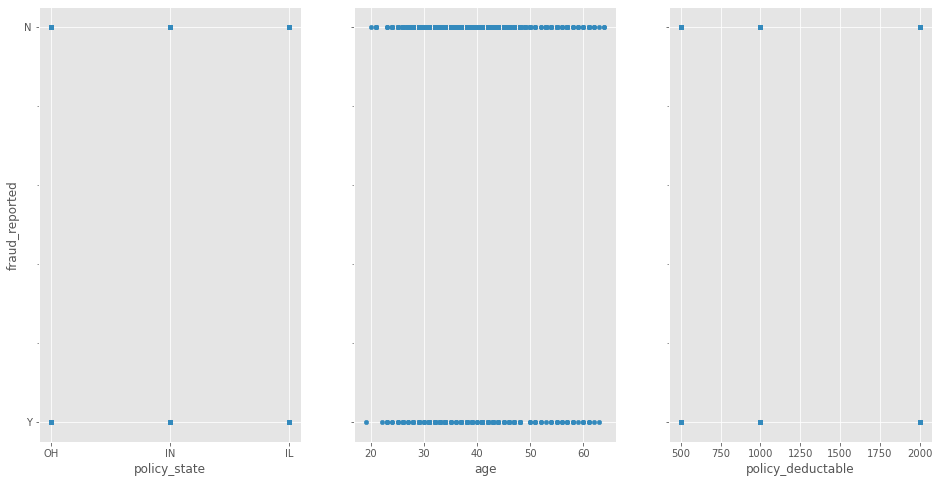

In [109]:
fig,axs = plt.subplots(1,3,sharey = True)
df.plot(kind='scatter',x='policy_state',y='fraud_reported',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='age',y='fraud_reported',ax=axs[1])
df.plot(kind='scatter',x='policy_deductable',y='fraud_reported',ax=axs[2])
fig.savefig('testdata.jpg')

In [39]:
# I have used 3 different columns but none of them are positively or negatively correlated.

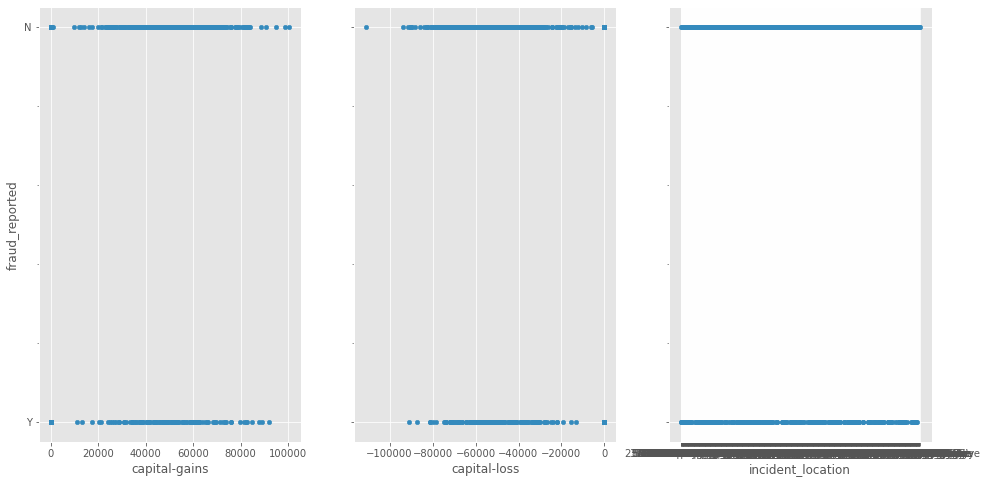

In [110]:
fig,axs = plt.subplots(1,3,sharey = True)
df.plot(kind='scatter',x='capital-gains',y='fraud_reported',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='capital-loss',y='fraud_reported',ax=axs[1])
df.plot(kind='scatter',x='incident_location',y='fraud_reported',ax=axs[2])
fig.savefig('testdata.jpg')

In [40]:
# I have used 3 different columns but none of them are positively or negatively correlated.

## Label Encoder

In [35]:
le = LabelEncoder()
df.policy_state = le.fit_transform(df.policy_state)
df.insured_sex = le.fit_transform(df.insured_sex)
df.insured_education_level = le.fit_transform(df.insured_education_level)
df.insured_occupation = le.fit_transform(df.insured_occupation)
df.insured_hobbies = le.fit_transform(df.insured_hobbies)
df.insured_relationship = le.fit_transform(df.insured_relationship)
df.incident_type = le.fit_transform(df.incident_type)
df.collision_type = le.fit_transform(df.collision_type)
df.incident_severity = le.fit_transform(df.incident_severity)
df.authorities_contacted = le.fit_transform(df.authorities_contacted)
df.incident_state = le.fit_transform(df.incident_state)
df.incident_city = le.fit_transform(df.incident_city)
df.incident_location = le.fit_transform(df.incident_location)
df.property_damage = le.fit_transform(df.property_damage)
df.police_report_available = le.fit_transform(df.police_report_available)
df.auto_make = le.fit_transform(df.auto_make)
df.auto_model = le.fit_transform(df.auto_model)
df.fraud_reported = le.fit_transform(df.fraud_reported)
df.policy_bind_date = le.fit_transform(df.policy_bind_date)
df.policy_csl = le.fit_transform(df.policy_csl)
df.incident_date = le.fit_transform(df.incident_date)

In [41]:
# I have used label encoder to convert the strings values into intergers.
# It will help me in model building.

## Distribution Plot

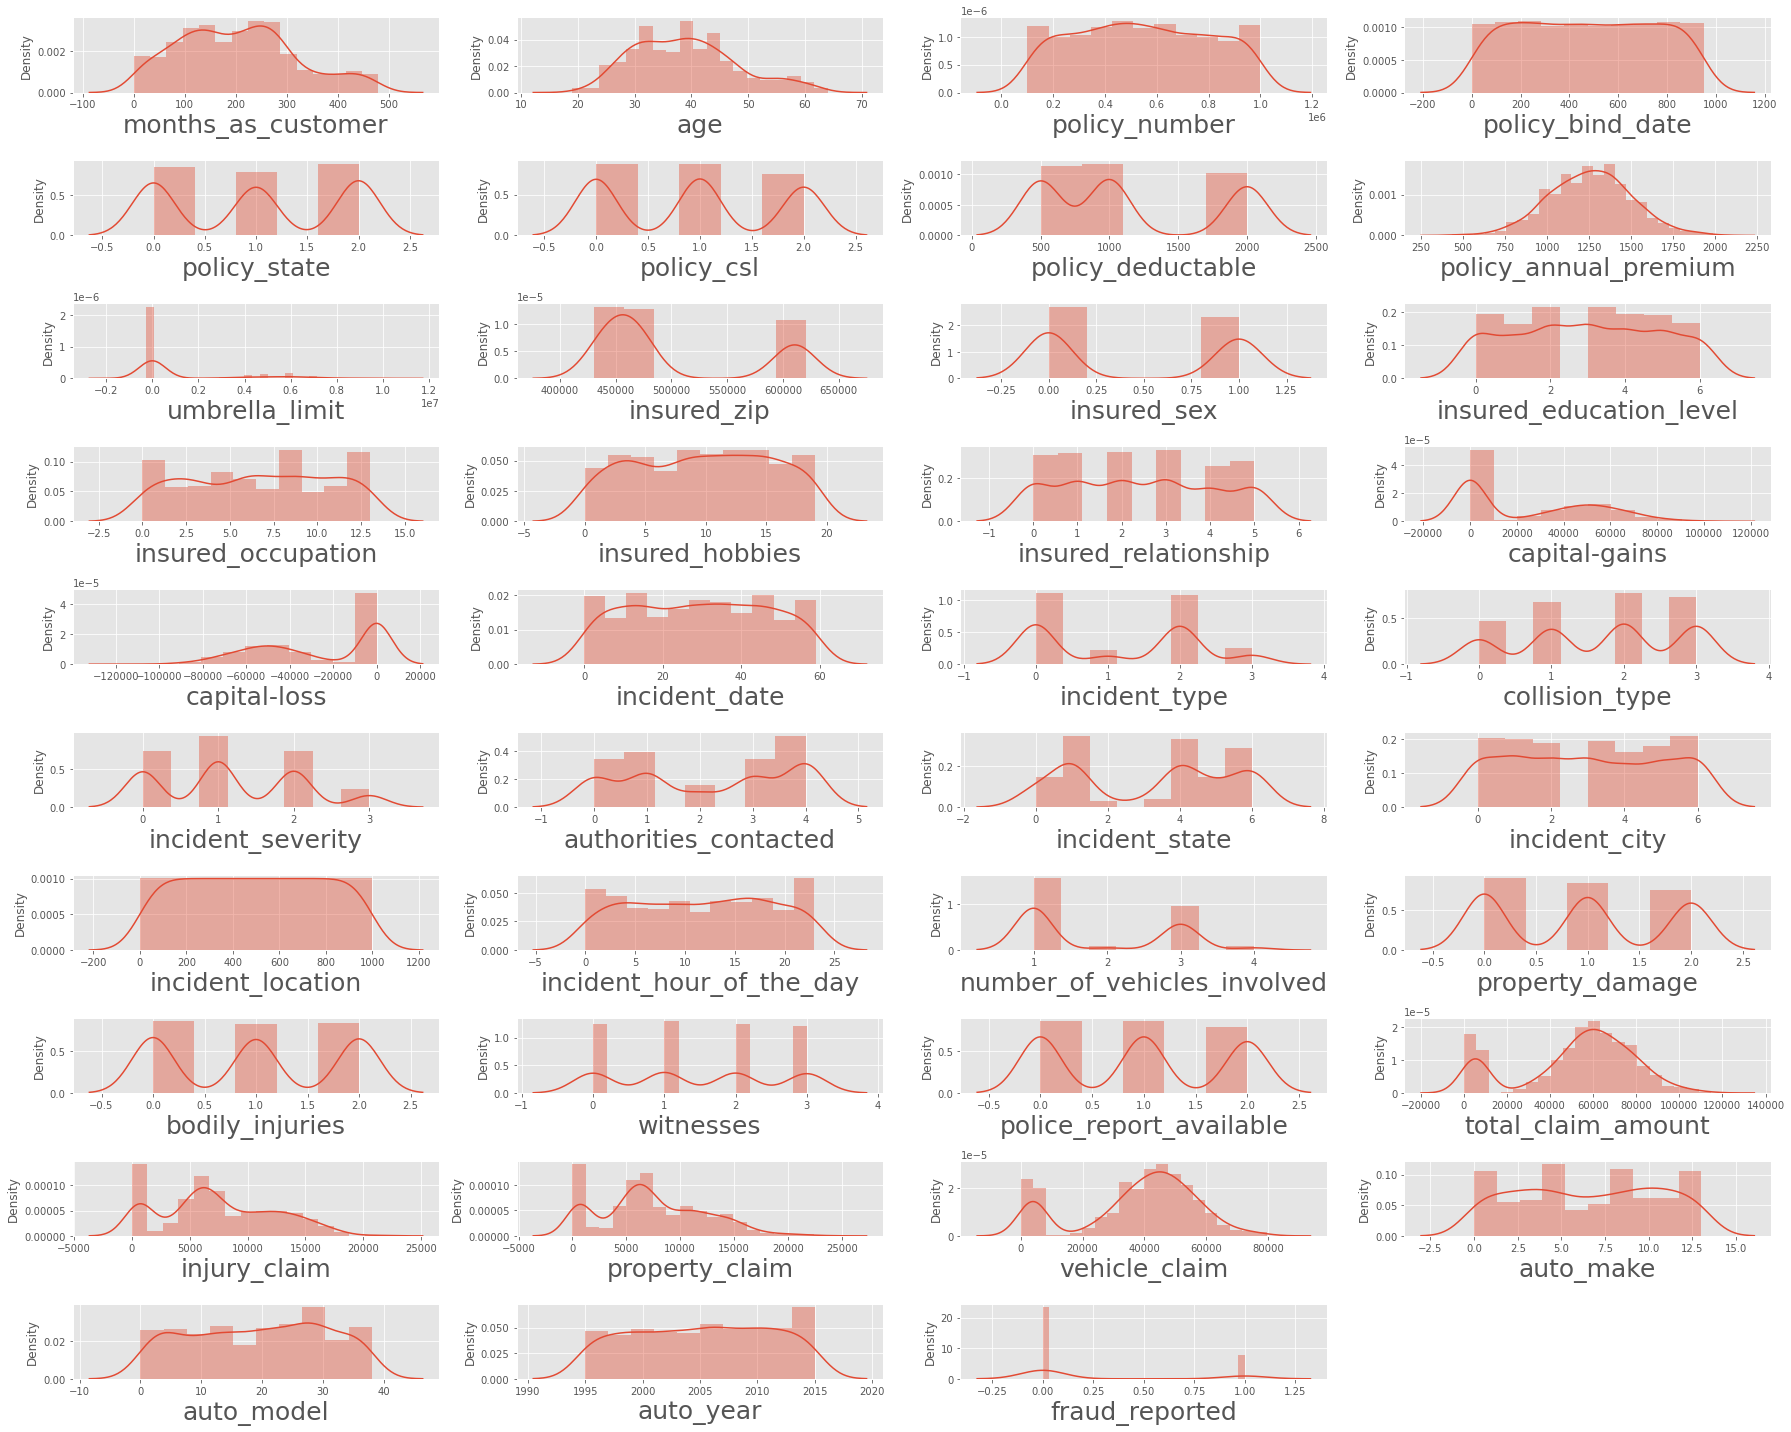

In [115]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=39:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

In [42]:
# There are skewness in the dataset which i will remove soon.
# There are few zero values as well that also need to be taken care.

## Replacing the zero values from different columns

In [36]:
# Replacing categorial columns with mean
df['policy_bind_date']=df['policy_bind_date'].replace(0,df['policy_bind_date'].mean())

In [43]:
# In policy bind date columns, there are few zero values that got replaced with the help of mean.

## Box Plot

months_as_customer                AxesSubplot(0.125,0.816017;0.168478x0.0639831)
age                            AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
policy_number                  AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
policy_bind_date               AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
policy_state                      AxesSubplot(0.125,0.739237;0.168478x0.0639831)
policy_csl                     AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
policy_deductable              AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
policy_annual_premium          AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
umbrella_limit                    AxesSubplot(0.125,0.662458;0.168478x0.0639831)
insured_zip                    AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
insured_sex                    AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
insured_education_level        AxesSubplot(0.731522,0.662458;0.168478x0.0639831)
insured_occupation          

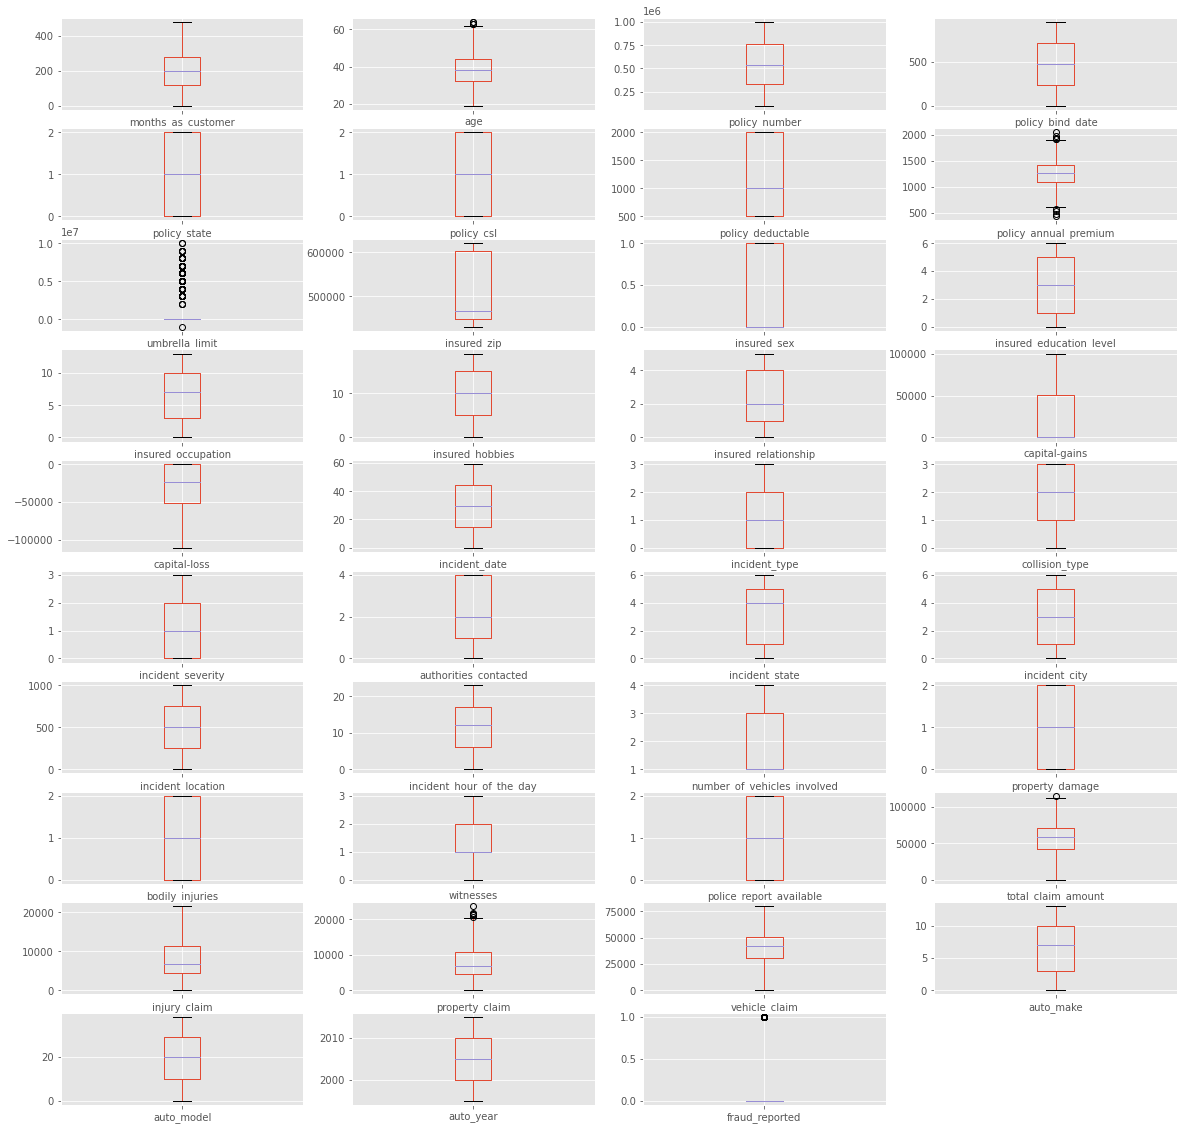

In [117]:
df.plot(kind='box',subplots=True,layout=(10,4),figsize=(20,20))

In [44]:
# There are outliers in the dataset that i will remove it with the help of z score.

## Z score

In [37]:
z_score = zscore(df[['age','policy_annual_premium','total_claim_amount','property_claim']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.describe()

months_as_customer         age  policy_number  policy_bind_date  \
count          996.000000  996.000000     996.000000        996.000000   
mean           204.449799   38.980924  546514.416667        475.035137   
std            115.023399    9.140700  256858.784341        274.166991   
min              0.000000   19.000000  100804.000000          1.000000   
25%            116.000000   32.000000  336472.250000        235.750000   
50%            200.000000   38.000000  533940.500000        474.166000   
75%            277.000000   44.250000  759099.750000        711.250000   
max            479.000000   64.000000  999435.000000        950.000000   

       policy_state  policy_csl  policy_deductable  policy_annual_premium  \
count    996.000000  996.000000         996.000000             996.000000   
mean       1.015060    0.948795        1137.550201            1257.616446   
std        0.830798    0.804753         612.397564             240.385312   
min        0.000000    0.000000         500.000000             538.170000   
25%        0.000000    0.000000         500.000000            1090.567500   
50%        1.000000    1.000000        1000.000000            1257.595000   
75%        2.000000    2.000000        2000.000000            1415.695000   
max        2.000000    2.000000        2000.000000            1969.630000   

       umbrella_limit    insured_zip  ...   witnesses  \
count    9.960000e+02     996.000000  ...  996.000000   
mean     1.105422e+06  500954.633534  ...    1.481928   
std      2.300957e+06   71577.584889  ...    1.110333   
min     -1.000000e+06  430104.000000  ...    0.000000   
25%      0.000000e+00  448404.500000  ...    0.750000   
50%      0.000000e+00  466391.500000  ...    1.000000   
75%      0.000000e+00  603141.000000  ...    2.000000   
max      1.000000e+07  620962.000000  ...    3.000000   

       police_report_available  total_claim_amount  injury_claim  \
count               996.000000          996.000000    996.000000   
mean                  0.313253        52735.100402   7427.680723   
std                   0.464049        26373.980757   4879.556218   
min                   0.000000          100.000000      0.000000   
25%                   0.000000        41812.500000   4295.000000   
50%                   0.000000        57935.000000   6770.000000   
75%                   1.000000        70530.000000  11285.000000   
max                   1.000000       114920.000000  21450.000000   

       property_claim  vehicle_claim   auto_make  auto_model    auto_year  \
count      996.000000     996.000000  996.000000  996.000000   996.000000   
mean      7385.702811   37921.716867    6.545181   19.324297  2005.096386   
std       4799.806634   18874.919904    4.032153   11.146275     6.015954   
min          0.000000      70.000000    0.000000    0.000000  1995.000000   
25%       4445.000000   30292.500000    3.000000   10.000000  2000.000000   
50%       6745.000000   42100.000000    7.000000   20.000000  2005.000000   
75%      10865.000000   50762.500000   10.000000   29.000000  2010.000000   
max      21810.000000   79560.000000   13.000000   38.000000  2015.000000   

       fraud_reported  
count      996.000000  
mean         0.246988  
std          0.431476  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  

[8 rows x 39 columns]

In [45]:
# I have applied z score to clean the dataset so that outliers will be removed and model accuracy can be improved.

## After Removing Skewness & outliers  using Distribution Plot

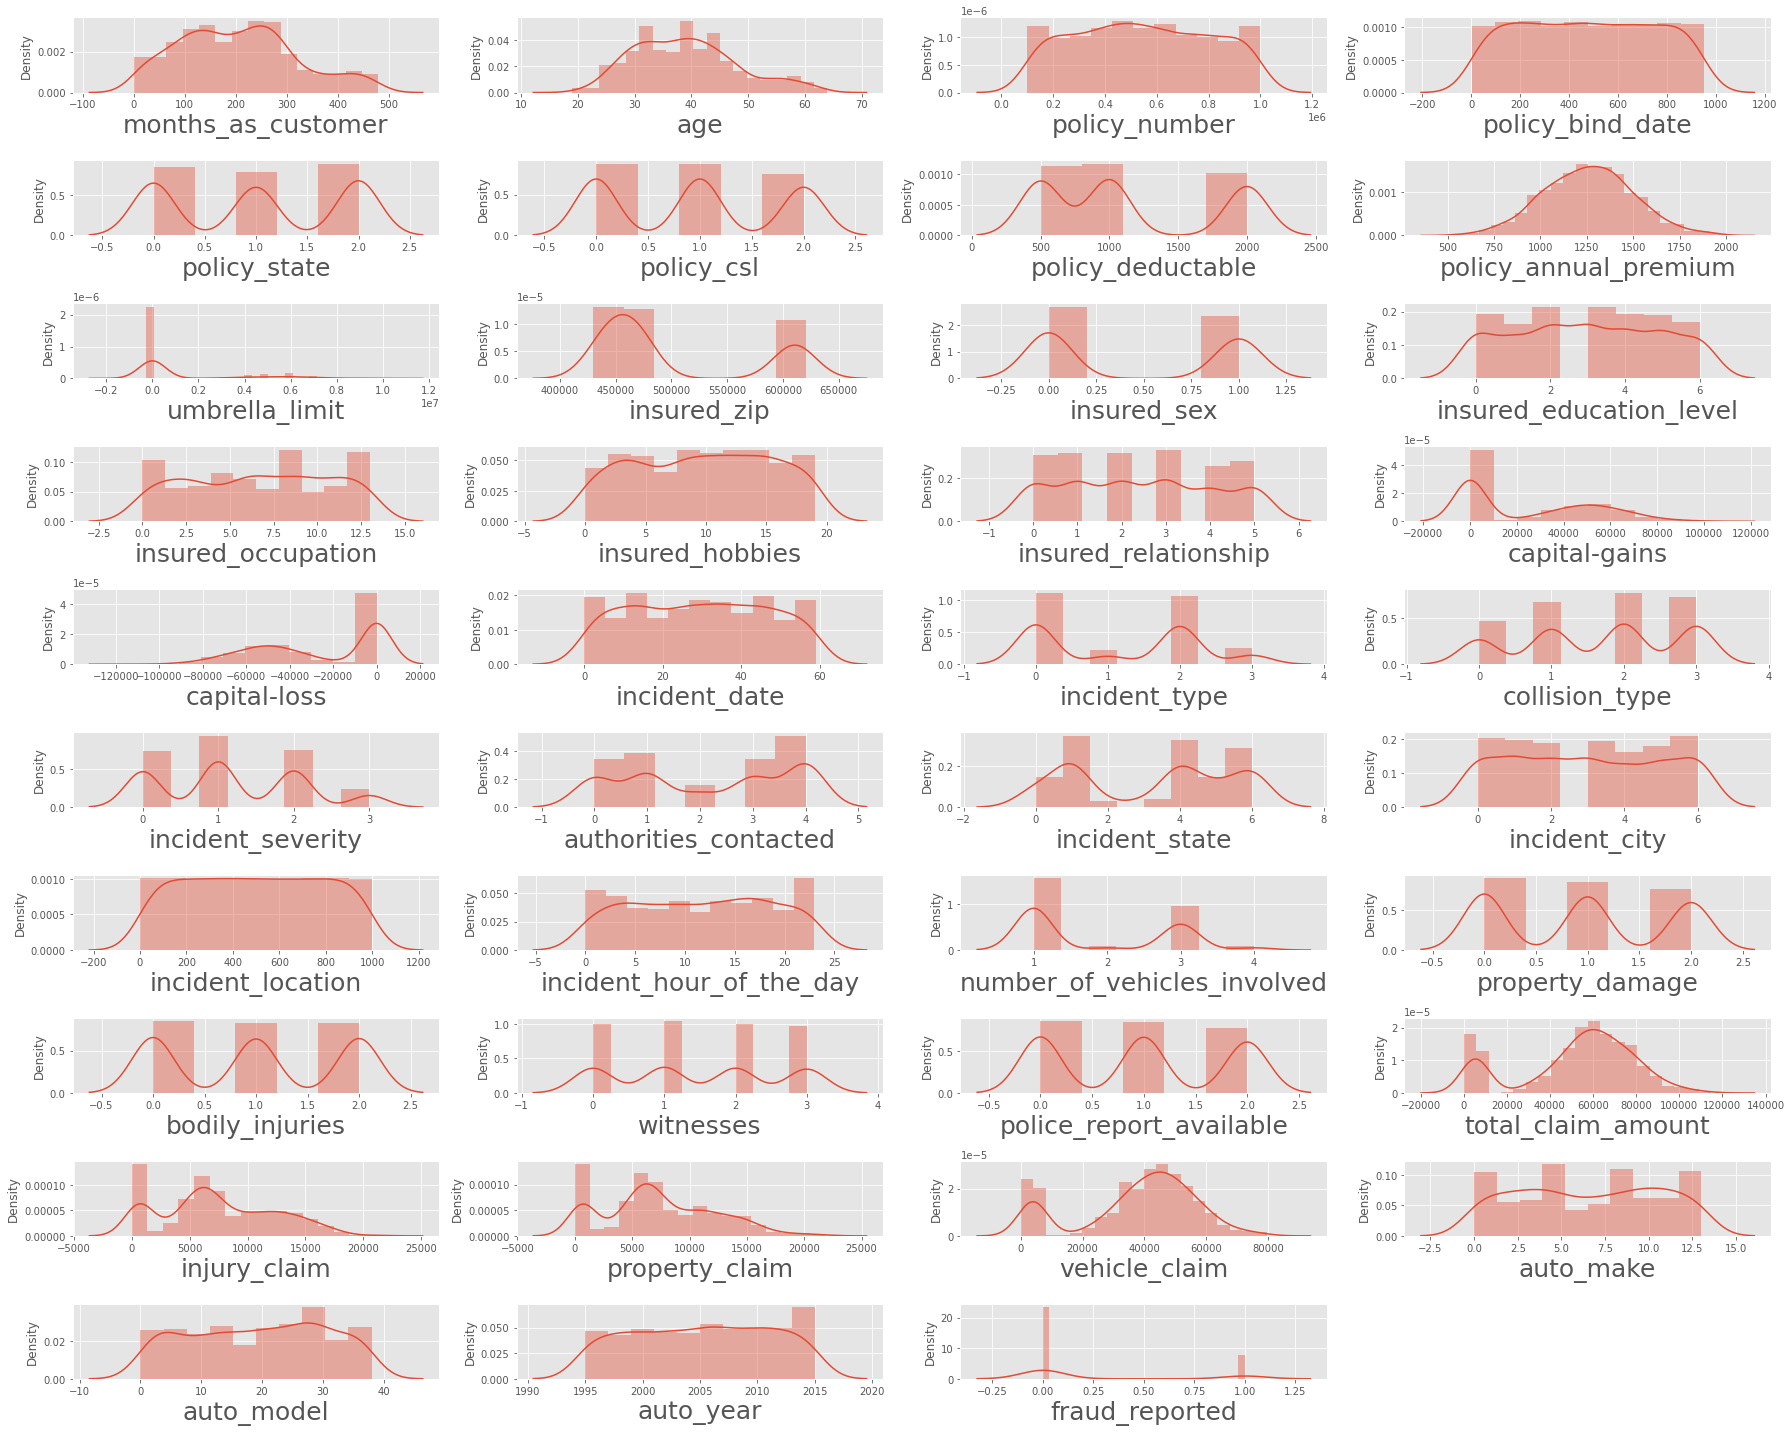

In [119]:
# checking distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=39:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

In [38]:
df.shape

(996, 39)

In [46]:
# After using Z score there are 996 rows and 39 columns which i will use for model prediction.

## Visualize the correlation

In [39]:
# find correlation of features vs target using corrwith
df.drop('fraud_reported',axis=1).corrwith(df.fraud_reported)

months_as_customer             0.020966
age                            0.012408
policy_number                 -0.034174
policy_bind_date               0.057435
policy_state                   0.028864
policy_csl                    -0.038795
policy_deductable              0.015833
policy_annual_premium         -0.010174
umbrella_limit                 0.058781
insured_zip                    0.018075
insured_sex                    0.032173
insured_education_level        0.011520
insured_occupation             0.003335
insured_hobbies               -0.047983
insured_relationship           0.017992
capital-gains                 -0.018919
capital-loss                  -0.012552
incident_date                 -0.052056
incident_type                 -0.047850
collision_type                -0.014184
incident_severity             -0.405287
authorities_contacted         -0.043676
incident_state                -0.051534
incident_city                 -0.038545
incident_location             -0.005656


## correlation

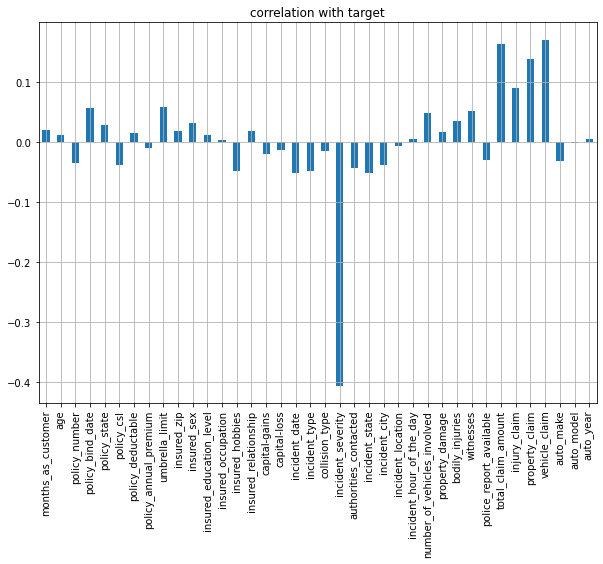

In [40]:
df.drop('fraud_reported',axis=1).corrwith(df.fraud_reported).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

In [41]:
# The above plot gives me an clear idea that few columns are positively correlated and few are negatively correlated with label.
# However i will use all the columns for model prediction.

## Machine Learning

In [42]:
x = df.drop('fraud_reported',axis=1)
y = df.fraud_reported

In [43]:
# I have divided dataset into feature and label.

## StandardScaler

In [44]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.07467064,  0.98718995, -0.09710371, ...,  0.85724795,
        -1.64480984, -0.18233788],
       [ 0.20484556,  0.33045533, -0.79323246, ...,  0.36098584,
        -0.65743728,  0.31658665],
       [-0.61279003, -1.0924697 ,  0.54993063, ..., -0.63153838,
         0.95826328,  0.31658665],
       ...,
       [-0.64758303, -0.54519084,  1.44900036, ...,  1.105379  ,
        -0.02910929, -1.5128033 ],
       [ 2.20544326,  2.51957075, -0.04897918, ..., -1.37593154,
        -1.28576528, -1.18018695],
       [ 2.18804676,  2.30065921,  0.03725934, ...,  0.36098584,
        -0.65743728,  0.31658665]])

In [45]:
# Standard scaler is basically scaling the date in one range so that it will be easy for Model building.

## VIF - variance inflation factor

In [46]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

vif                     Features
0   6.833326           months_as_customer
1   6.848315                          age
2   1.030116                policy_number
3   1.027389             policy_bind_date
4   1.038405                 policy_state
5   1.032927                   policy_csl
6   1.039105            policy_deductable
7   1.040646        policy_annual_premium
8   1.032321               umbrella_limit
9   1.030804                  insured_zip
10  1.029644                  insured_sex
11  1.045920      insured_education_level
12  1.020975           insured_occupation
13  1.051368              insured_hobbies
14  1.052161         insured_relationship
15  1.037006                capital-gains
16  1.042469                 capital-loss
17  1.036330                incident_date
18  5.130134                incident_type
19  1.044605               collision_type
20  1.200020            incident_severity
21  1.087834        authorities_contacted
22  1.050792               incident_state
23  1.030553                incident_city
24  1.041484            incident_location
25  1.095667     incident_hour_of_the_day
26  5.114207  number_of_vehicles_involved
27  1.039006              property_damage
28  1.023680              bodily_injuries
29  1.046185                    witnesses
30  1.039585      police_report_available
31       inf           total_claim_amount
32       inf                 injury_claim
33       inf               property_claim
34       inf                vehicle_claim
35  1.075348                    auto_make
36  1.070527                   auto_model
37  1.042126                    auto_year

In [49]:
# VIF is used to detect the severity of multicollinearity in the ordinary least square (OLS) regression analysis.
# Multicollinearity is a phenomenon when two or more independent variables are highly intercorrelated.
# From the above stats i can say that none of the features are highly intercorrelated it means Multicollinearity doesn't exist.

## Model Building

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

In [51]:
# For model prediction i am dividing the dataset into 2 parts.
# One part is used for training purpose i.e 75% dataset.
# other part is used for testing purpose i.e 25% dataset.

## Logistic Regression

In [48]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [49]:
y_pred = log_reg.predict(x_test)

In [50]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[177,  13],
       [ 38,  21]], dtype=int64)

In [51]:
log_reg.score(x_test,y_test)

0.7951807228915663

In [53]:
# Finding classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       190
           1       0.62      0.36      0.45        59

    accuracy                           0.80       249
   macro avg       0.72      0.64      0.66       249
weighted avg       0.77      0.80      0.77       249



In [1]:
# Logistic Regression accuracy score 80%

### AUC Score

In [54]:
roc_auc_score(y_test,log_reg.predict(x_test))

0.6437555753791258

## KNN

## Using SelectKBest Method for best features selection

In [55]:
best_features = SelectKBest(score_func=f_classif,k=32)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

# concatenate Dataframe
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['Features_Name','Score']
print(feature_scores.nlargest(32,'Score'))

                  Features_Name       Score
20            incident_severity  195.361320
34                vehicle_claim   29.793150
31           total_claim_amount   27.451602
33               property_claim   19.460535
32                 injury_claim    8.099000
8                umbrella_limit    3.446357
3              policy_bind_date    3.289805
17                incident_date    2.700925
22               incident_state    2.646854
29                    witnesses    2.621027
26  number_of_vehicles_involved    2.354487
13              insured_hobbies    2.293819
18                incident_type    2.281139
21        authorities_contacted    1.899728
5                    policy_csl    1.498303
23                incident_city    1.479034
28              bodily_injuries    1.253161
2                 policy_number    1.162229
10                  insured_sex    1.029938
35                    auto_make    0.972307
30      police_report_available    0.920619
4                  policy_state 

### KNN model Building

In [56]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [57]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[179,  11],
       [ 50,   9]], dtype=int64)

In [58]:
knn.score(x_test,y_test)

0.7550200803212851

In [59]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       190
           1       0.45      0.15      0.23        59

    accuracy                           0.76       249
   macro avg       0.62      0.55      0.54       249
weighted avg       0.70      0.76      0.71       249



## Let use Grid search CV for the best parameter to improve the accuracy

In [60]:
param_grid = {'algorithm':['kd_tree','brute'],
             'leaf_size':[15,18],
             'n_neighbors':[3,5,7]
             }

In [61]:
gridsearch = GridSearchCV(estimator=knn,param_grid=param_grid)

In [62]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18], 'n_neighbors': [3, 5, 7]})

In [63]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 7}

In [64]:
# we will use the best parameters in our knn algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 15, n_neighbors=7)

In [65]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=15, n_neighbors=7)

In [66]:
y_pred = knn.predict(x_test)

In [67]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[181,   9],
       [ 54,   5]], dtype=int64)

In [68]:
knn.score(x_test,y_test)

0.7469879518072289

In [69]:
# Finding classification report of knn
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       190
           1       0.36      0.08      0.14        59

    accuracy                           0.75       249
   macro avg       0.56      0.52      0.49       249
weighted avg       0.67      0.75      0.68       249



In [70]:
# In KNN algorithm i used hyper parameter tunning to improve accuracy score.
# Hyper Parameter is not improving the accuracy score.
# KNN Accuracy Score 76%.

### AUC score

In [71]:
roc_auc_score(y_test,knn.predict(x_test))

0.5186886708296163

## RandomForestClassifier

In [72]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

In [73]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[173,  17],
       [ 42,  17]], dtype=int64)

In [74]:
rfc.score(x_test,y_test)

0.7630522088353414

In [75]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       190
           1       0.50      0.29      0.37        59

    accuracy                           0.76       249
   macro avg       0.65      0.60      0.61       249
weighted avg       0.73      0.76      0.74       249



### Let use Grid search CV for the best parameter to improve the accuracy

In [76]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [77]:
rfc = grd.best_estimator_

In [78]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=15)

In [79]:
y_pred = rfc.predict(x_test)

In [80]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[170,  20],
       [ 38,  21]], dtype=int64)

In [81]:
rfc.score(x_test,y_test)

0.7670682730923695

In [82]:
# Finding classification report of RandomForestClassifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       190
           1       0.51      0.36      0.42        59

    accuracy                           0.77       249
   macro avg       0.66      0.63      0.64       249
weighted avg       0.75      0.77      0.75       249



In [84]:
# In Random forest algorithm i used hyper parameter tunning to improve accuracy score.
# Hyper Parameter is improving the accuracy score.
# Random forest Accuracy Score 77%.

### AUC Score

In [85]:
roc_auc_score(y_test,rfc.predict(x_test))

0.6253345227475469

## Decision Tree Classifier

In [86]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

In [87]:
y_pred = log_reg.predict(x_test)

In [88]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[177,  13],
       [ 38,  21]], dtype=int64)

In [89]:
dtc.score(x_test,y_test)

0.7751004016064257

In [90]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       190
           1       0.62      0.36      0.45        59

    accuracy                           0.80       249
   macro avg       0.72      0.64      0.66       249
weighted avg       0.77      0.80      0.77       249



### Let use Grid search CV for the best parameter to improve the accuracy

In [91]:
grid_param = {'criterion':['gini','entropy'],
             'max_depth':range(2,10,3),
             'min_samples_leaf':range(1,10,2),
             'min_samples_split':range(2,10,2)
             }

In [92]:
grid_search = GridSearchCV(estimator=dtc,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=1)

In [93]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [94]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [95]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=9,min_samples_split=6)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=9, min_samples_split=6)

In [96]:
y_pred = dtc.predict(x_test)

In [97]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[168,  22],
       [ 20,  39]], dtype=int64)

In [98]:
dtc.score(x_test,y_test)

0.8313253012048193

In [99]:
# Finding classification report of DecisionTreeClassifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       190
           1       0.64      0.66      0.65        59

    accuracy                           0.83       249
   macro avg       0.77      0.77      0.77       249
weighted avg       0.83      0.83      0.83       249



In [106]:
# In Decision Tree Classifier algorithm i used hyper parameter tunning to improve accuracy score.
# Hyper Parameter is improving the accuracy score.
# Decision Tree Classifier Score 83%.

### AUC Score

In [101]:
# Decision Tree Classifier AUC score
roc_auc_score(y_test,dtc.predict(x_test))

0.7726137377341659

## Roc_Auc Curve

In [111]:
from IPython.display import Image
Image(url= "https://i.ytimg.com/vi/ZlGz9Nl5irs/maxresdefault.jpg")

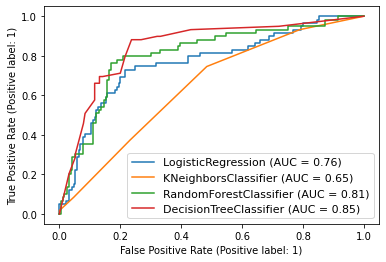

In [103]:
disp = plot_roc_curve(log_reg,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

## Saving the Best Model

In [104]:
import pickle

In [105]:
# saving the Random Forest Classifier Model

filename = 'finalized_model.pickle'
pickle.dump(dtc,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

In [109]:
from IPython.display import Image
Image(url= "https://i0.wp.com/dataaspirant.com/wp-content/uploads/2017/01/B03905_05_01-compressor.png?resize=690%2C381")

In [110]:
# The best model is Decision Tree accuracy score which is 83%